In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as pl
import calendar 
import missingno as msno



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
feature_data = pd.read_csv("Features_data_set.csv")
sales_data = pd.read_csv("sales_data_set.csv")
stores_data = pd.read_csv("stores_data_set.csv")

In [ ]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
feature_data['Date'] = pd.to_datetime(feature_data['Date'])

In [ ]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [ ]:
sales_feature = sales_data.merge(feature_data, left_on=('Store', 'Date'), 
                                 right_on=('Store', 'Date'), how='left')
# sales_feature.head()

sales_feature = pd.merge(sales_feature, stores_data, how = 'left', on=['Store'])
print(sales_feature.shape)
sales_feature.head()



(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


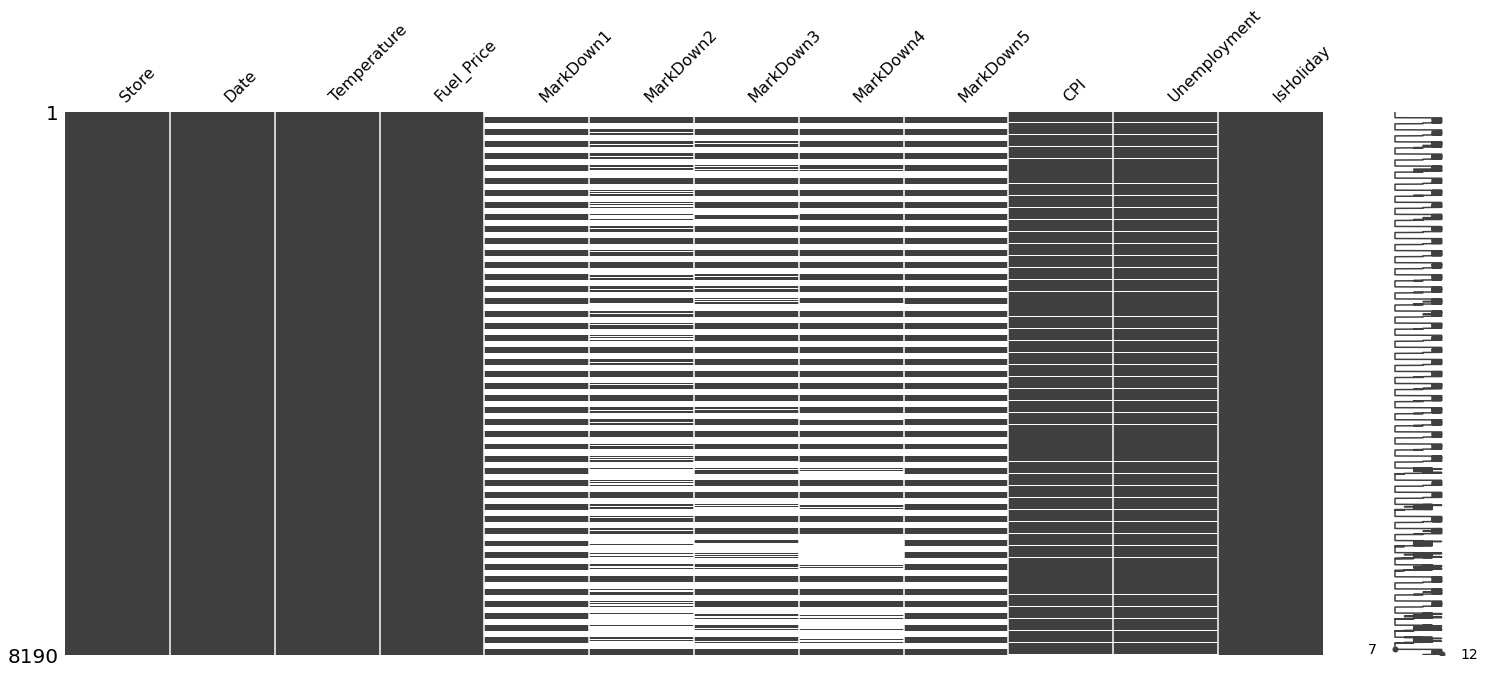

In [ ]:
msno.matrix(feature_data)

In [ ]:
feature_data["Store"].nunique()

45

In [ ]:
info = pd.DataFrame(feature_data.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(feature_data.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(feature_data.isnull().sum()/feature_data.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Column Type,int64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
null values (nb),0,0,0,0,4158,5269,4577,4726,4140,585,585,0
null values{%},0,0,0,0,50.7692,64.3346,55.8852,57.7045,50.5495,7.14286,7.14286,0


In [ ]:
feature_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [ ]:
sales_feature = sales_feature.assign(year = sales_feature.Date.dt.year)
sales_feature = sales_feature.assign(week = sales_feature.Date.dt.week)
sales_feature = sales_feature.assign(yearweek = sales_feature.year * 100 + sales_feature.week)
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,17,201017
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,48,201048
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,7,201007
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,8,201008
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,18,201018


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


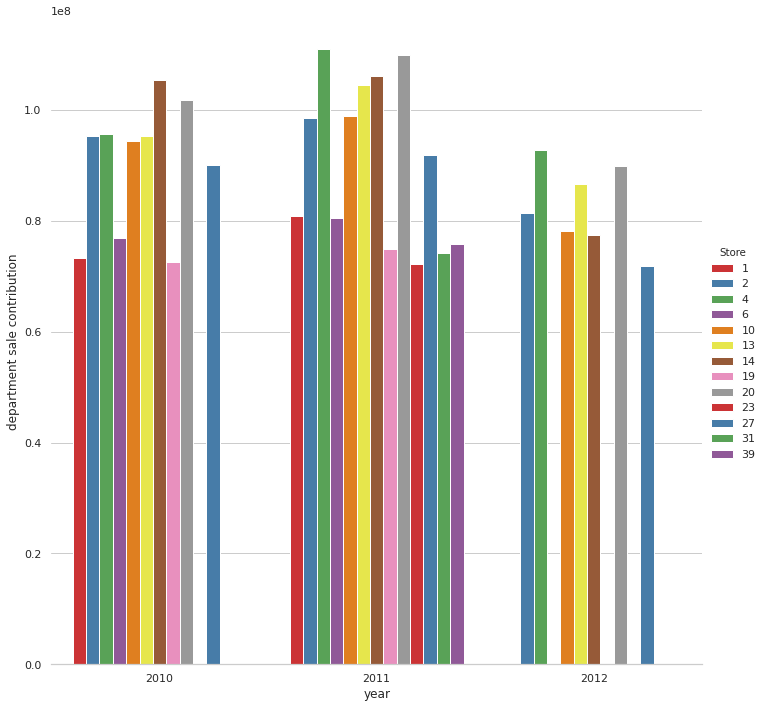

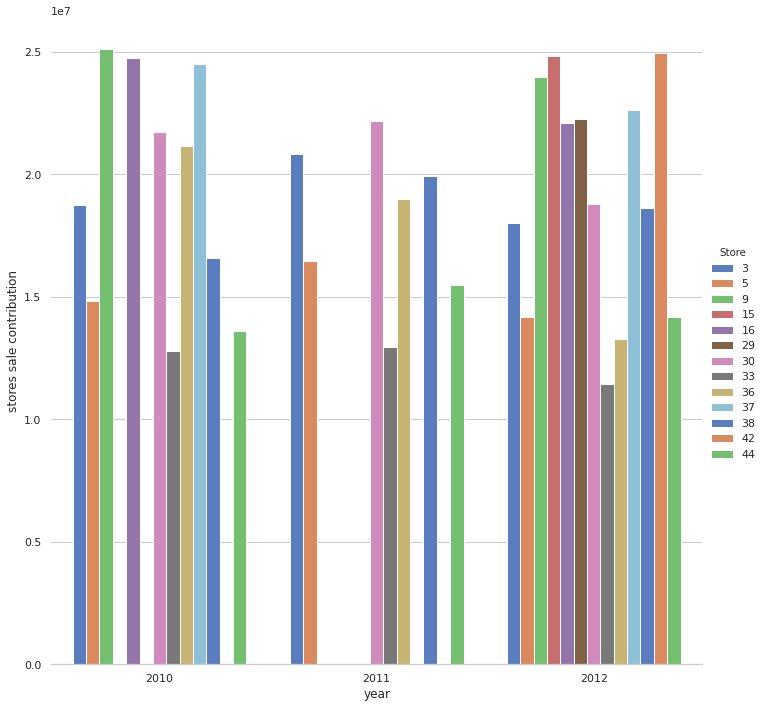

In [ ]:
dept_sales = sales_feature.groupby(by=(['Store', 'year']), as_index=False)['Weekly_Sales'].sum()
top_depts = dept_sales.nlargest(30, 'Weekly_Sales')
sns.set(style="whitegrid")
g = sns.factorplot(x="year", y="Weekly_Sales", hue="Store", data=top_depts,
                   size=10, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("department sale contribution")



bottom_depts = dept_sales.nsmallest(30, 'Weekly_Sales')
sns.set(style="whitegrid")
g = sns.factorplot(x="year", y="Weekly_Sales", hue="Store", data=bottom_depts,
                   size=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("stores sale contribution")

In [ ]:
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,17,201017
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,48,201048
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,7,201007
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,8,201008
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,18,201018


In [ ]:
sales_feature.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


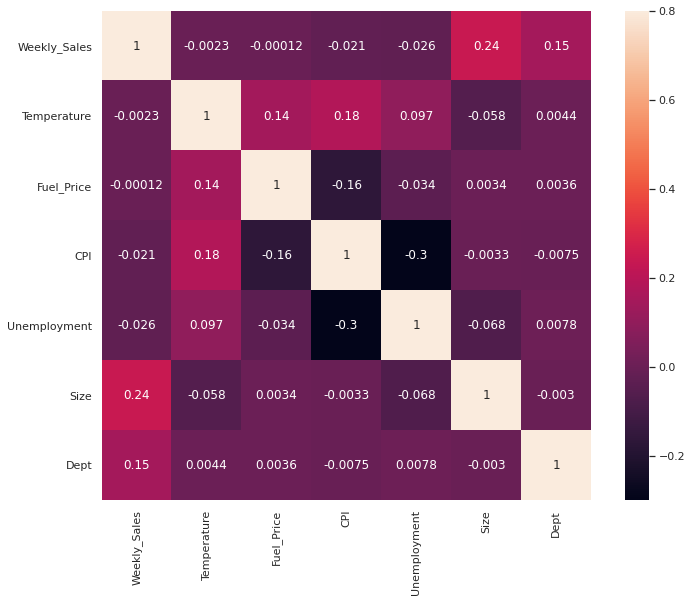

In [ ]:
import matplotlib.pyplot as plt
corrmat = sales_feature[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Dept']].corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

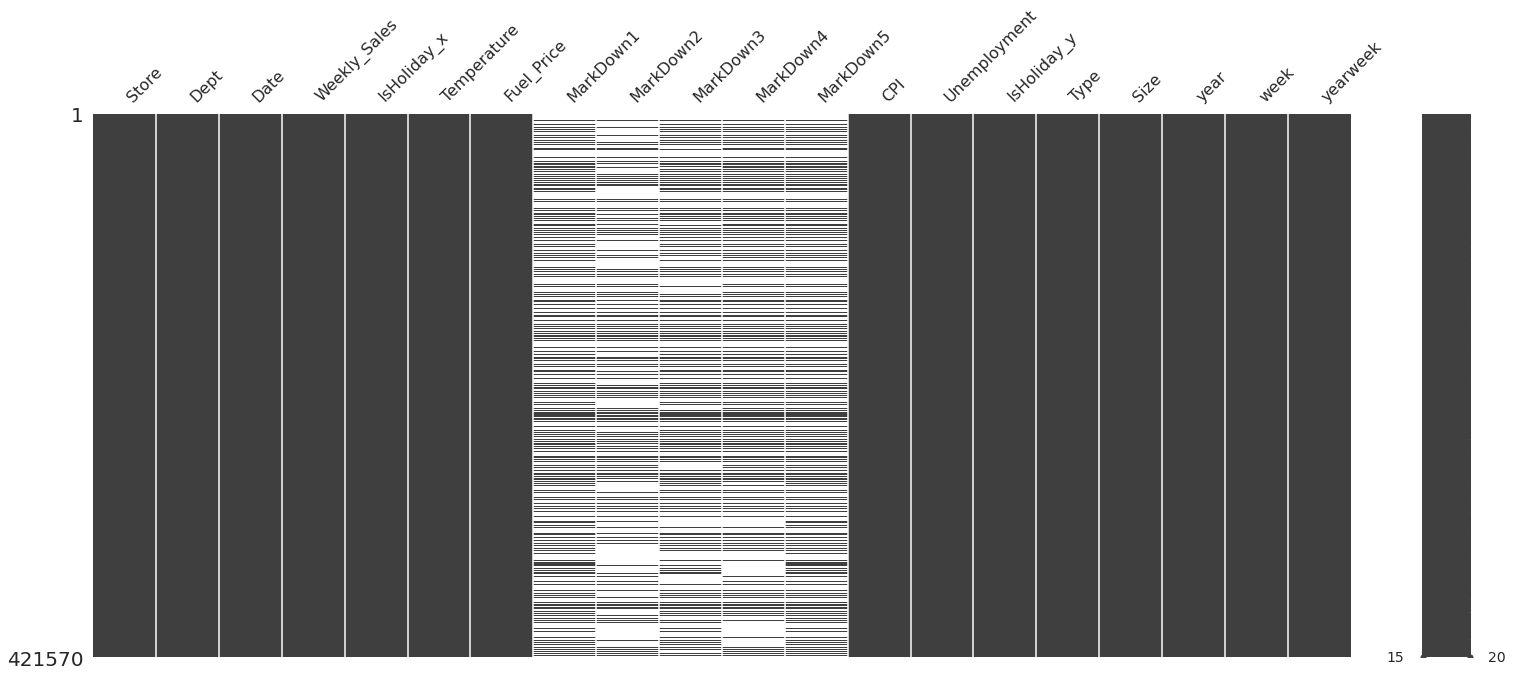

In [ ]:
msno.matrix(sales_feature)

In [ ]:
sales_feature["Type"].nunique()

3

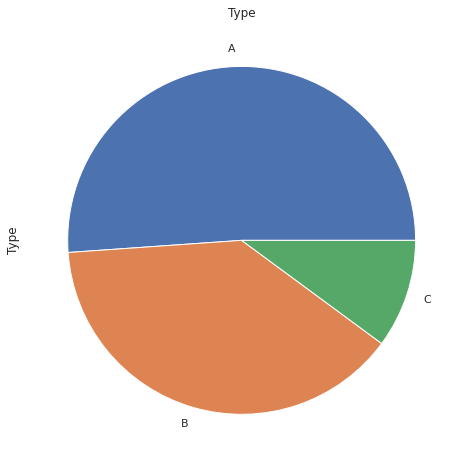

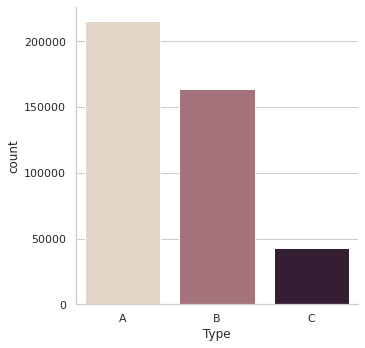

In [ ]:
temp = pd.DataFrame(sales_feature.Type.value_counts())
temp['Type'].plot(kind='pie', figsize=(14, 8))
plt.title('Type')
plt.show()

sns.catplot(x="Type", kind="count", palette="ch:.25", data=sales_feature);

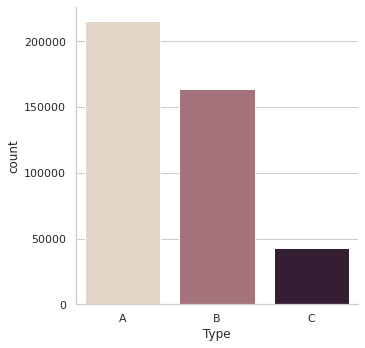

In [ ]:
sns.catplot(x="Type", kind="count", palette="ch:.25", data=sales_feature);

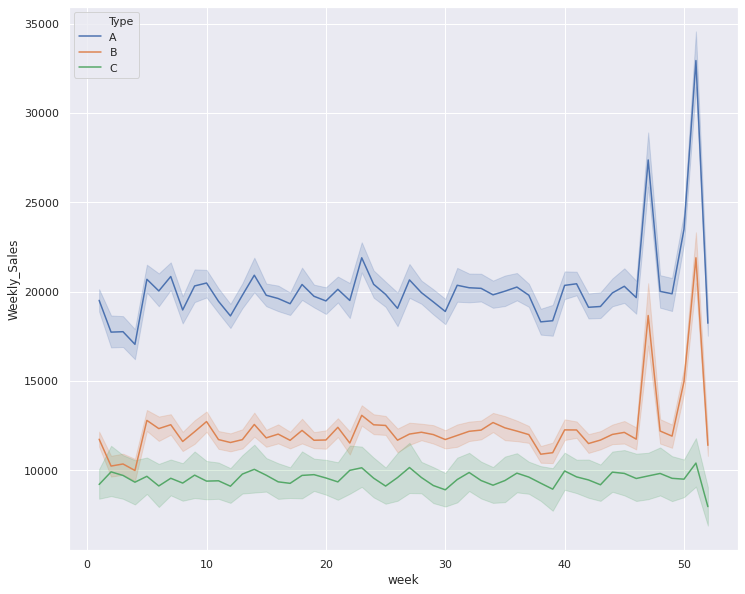

In [ ]:
# ax = sns.lineplot(x='week', y='Weekly_Sales', data = sales_feature)
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(x='week', y='Weekly_Sales', hue='Type', data = sales_feature)

In [ ]:
sales_feature['Weekly_Sales'].min(axis = 0)

-4988.94

In [ ]:
sales_feature['weekday'] = sales_feature['Date'].dt.day_name()
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,17,201017,Sunday
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,NaN,211.242170,8.106,True,A,151315,2010,48,201048,Thursday
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,NaN,211.289143,8.106,False,A,151315,2010,7,201007,Friday
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,NaN,211.319643,8.106,False,A,151315,2010,8,201008,Friday
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,NaN,211.350143,8.106,False,A,151315,2010,18,201018,Monday


In [ ]:
sales_feature['month'] = sales_feature['Date'].dt.month_name()
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May


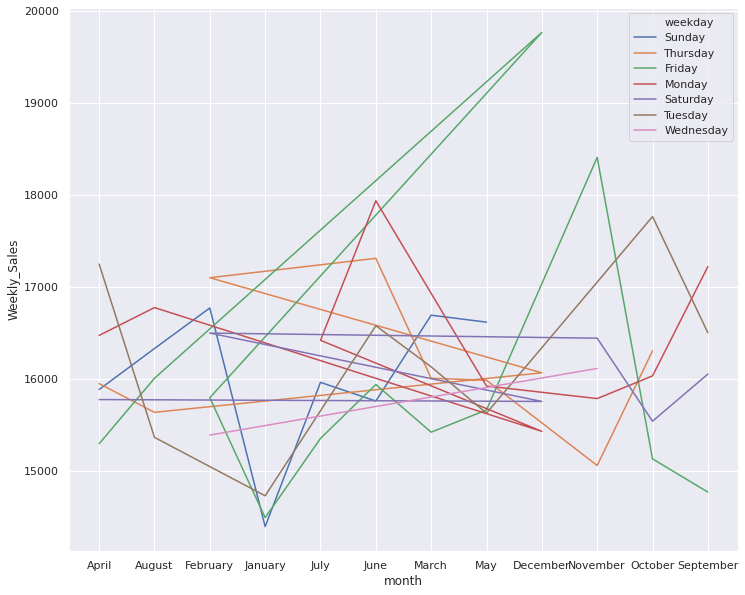

In [ ]:
ax = sns.lineplot(x='month', y='Weekly_Sales', hue = 'weekday', data = sales_feature, ci=None,  markers=True)

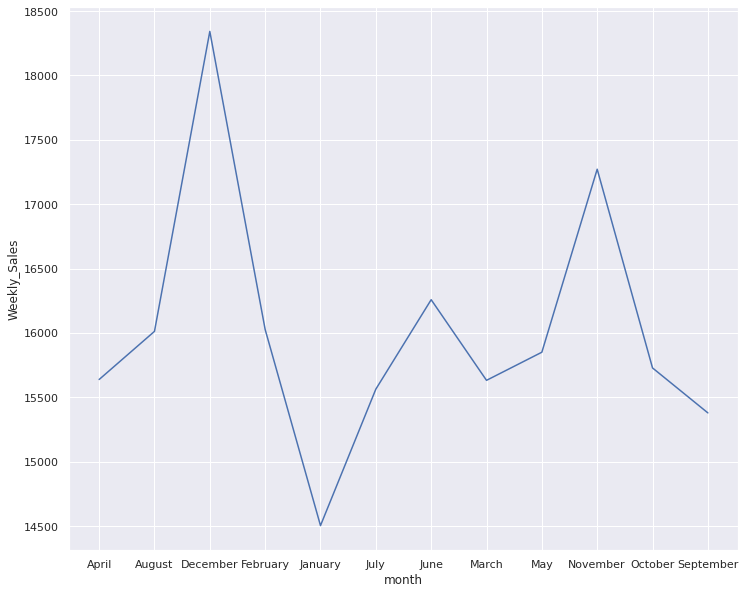

In [ ]:
ax = sns.lineplot(x='month', y='Weekly_Sales', data = sales_feature, ci=None,  markers=True)

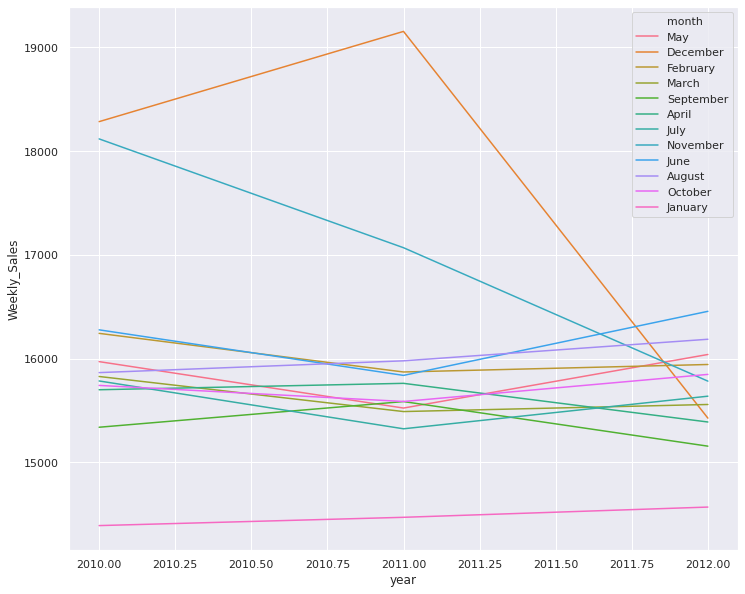

In [ ]:
ax = sns.lineplot(x='year', y='Weekly_Sales', hue = 'month', data = sales_feature, ci=None,  markers=True)

,year,Weekly_Sales
0,2010,16270.275737
1,2011,15954.070675
2,2012,15694.948597


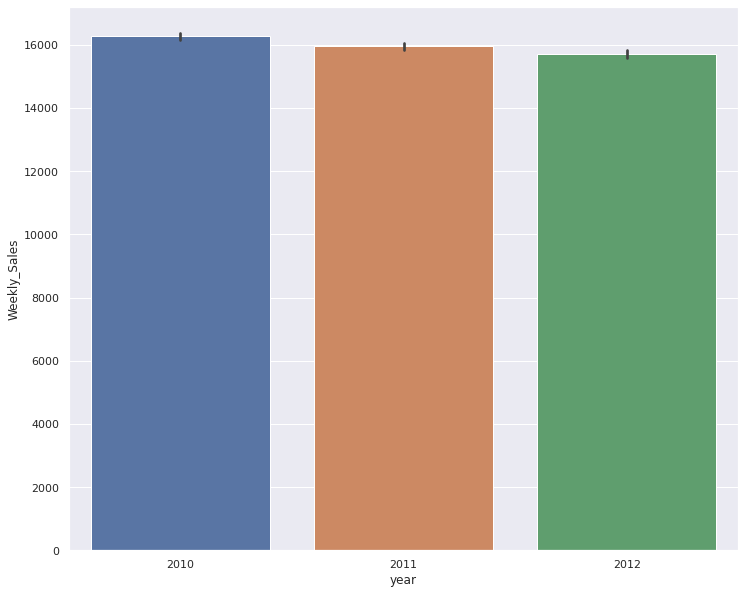

In [ ]:
ax = sns.barplot(x="year", y="Weekly_Sales", data=sales_feature)

sales_feature[['year', 'Weekly_Sales']].groupby('year', as_index = False).agg({'Weekly_Sales':'mean'})

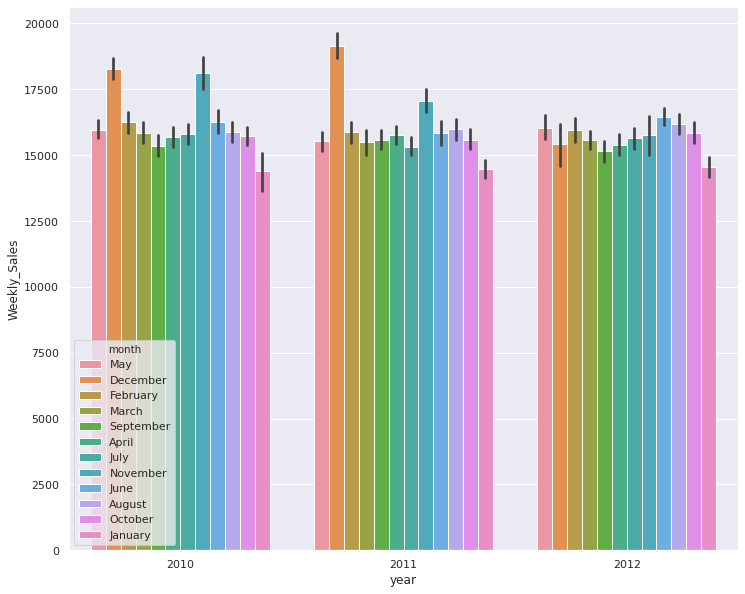

In [ ]:
ax = sns.barplot(x="year", y="Weekly_Sales",hue="month", data=sales_feature)



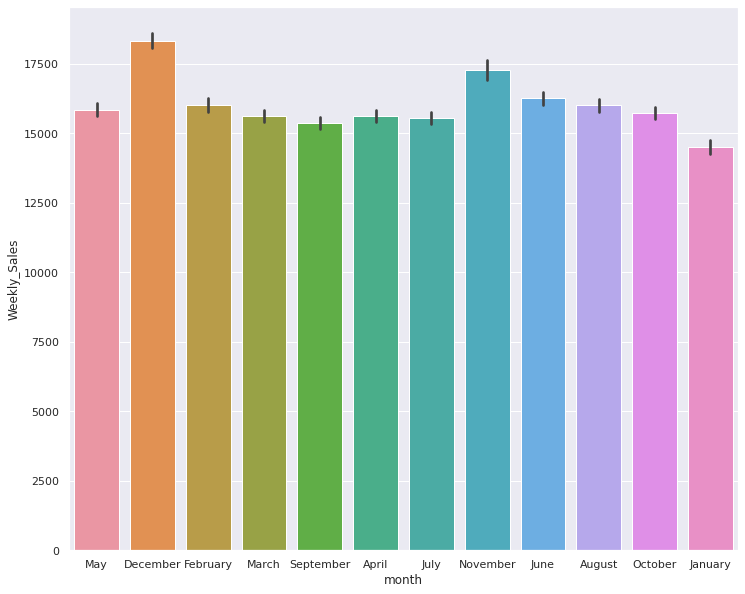

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.barplot(x="month", y="Weekly_Sales", data=sales_feature)

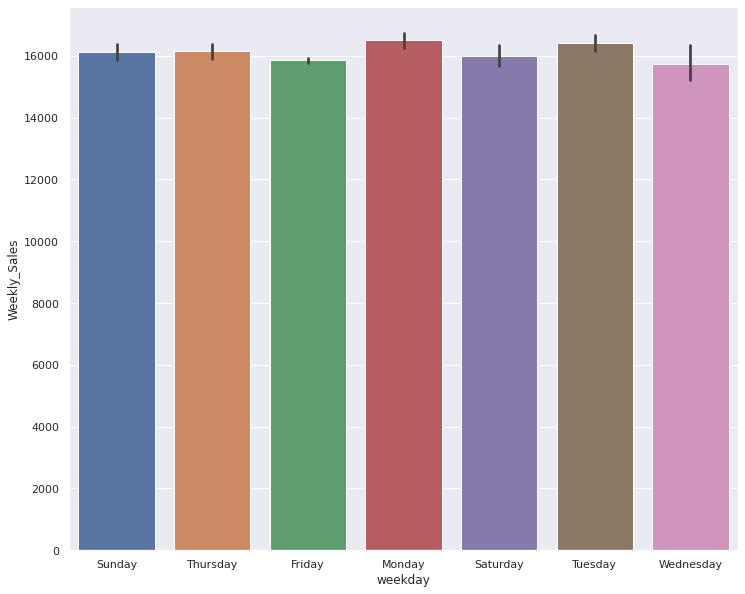

In [ ]:
ax = sns.barplot(x="weekday", y="Weekly_Sales", data=sales_feature)

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default


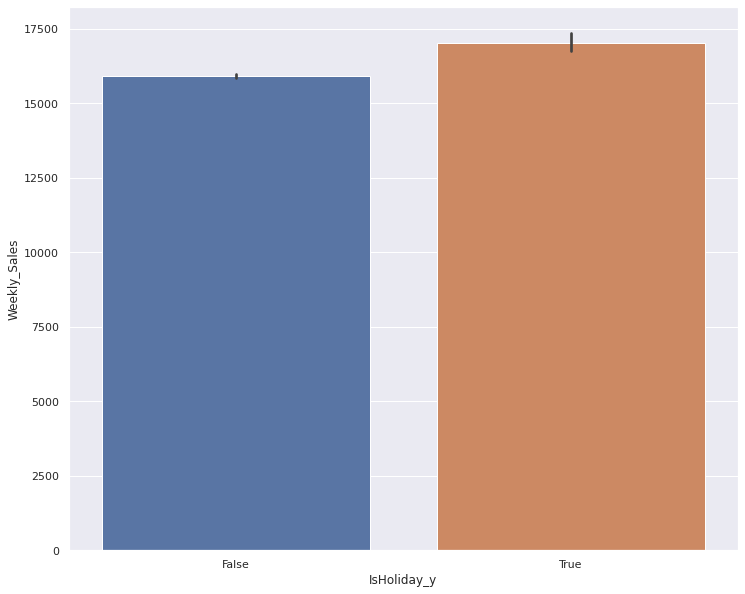

In [ ]:
ax = sns.barplot(x="IsHoliday_y", y="Weekly_Sales", data=sales_feature)



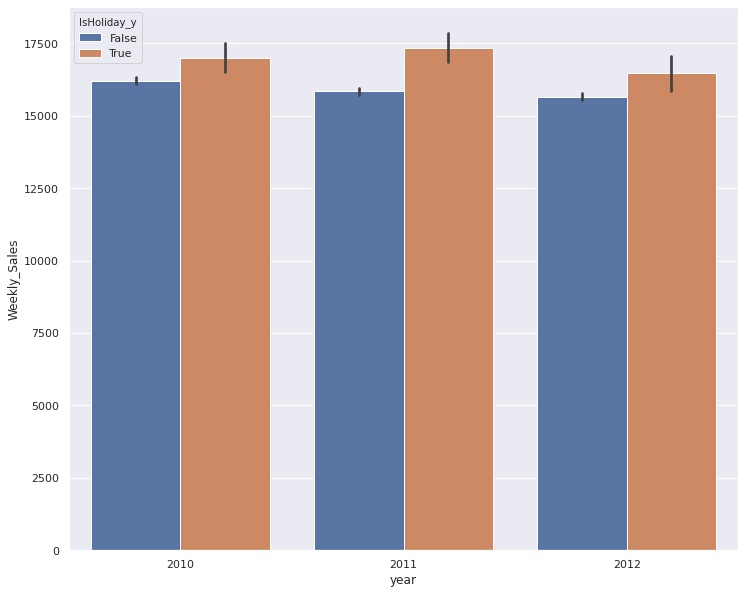

In [ ]:
ax = sns.barplot(x="year", y="Weekly_Sales",hue="IsHoliday_y", data=sales_feature)



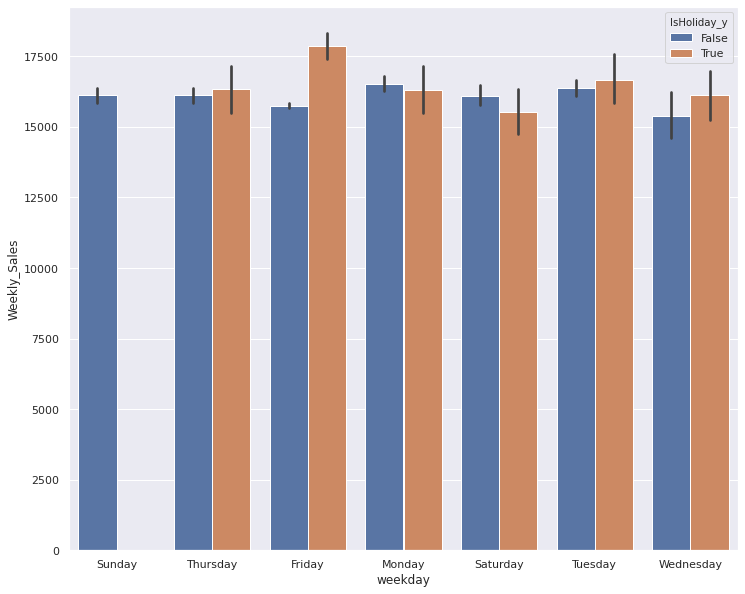

In [ ]:
ax = sns.barplot(x="weekday", y="Weekly_Sales",hue="IsHoliday_y", data=sales_feature)



15981.258123467243


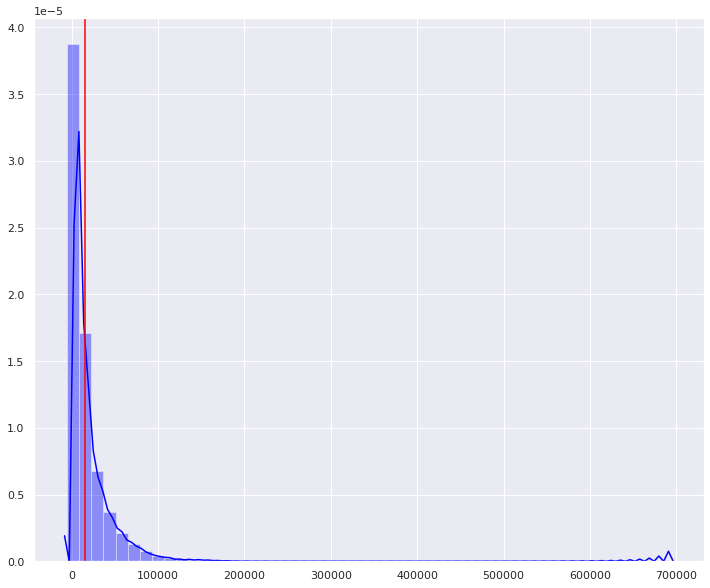

In [ ]:
x = sales_feature['Weekly_Sales'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = sales_feature['Weekly_Sales'].mean()
print(mean)

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

In [ ]:
sales_feature.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size',
       'year', 'week', 'yearweek', 'weekday', 'month'],
      dtype='object')

In [ ]:
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May


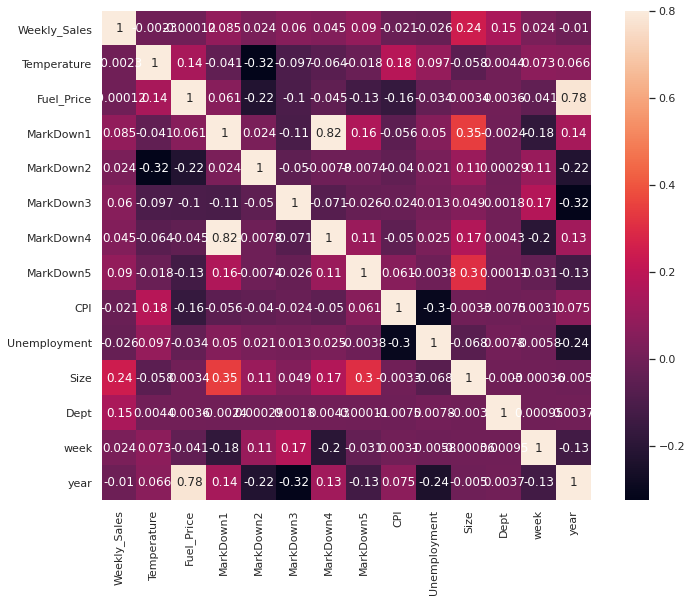

In [ ]:
import matplotlib.pyplot as plt
corrmat = sales_feature[['Weekly_Sales', 'Temperature', 'Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Dept','week','year']].corr()

#print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);
#print(denorm)

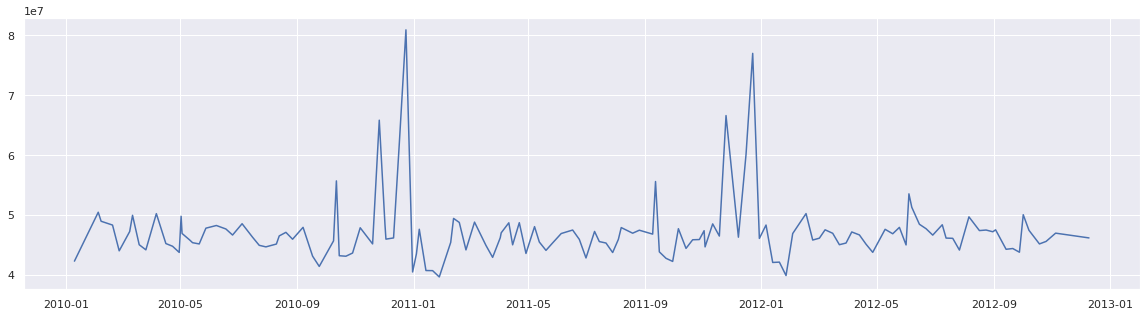

In [ ]:
df_average_sales_week = sales_feature.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

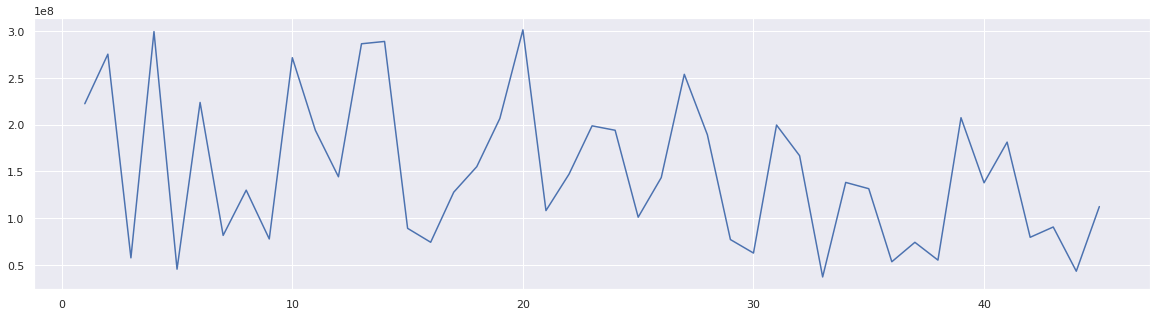

In [ ]:
df_average_sales_week = sales_feature.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Store, df_average_sales_week.Weekly_Sales)
plt.show()

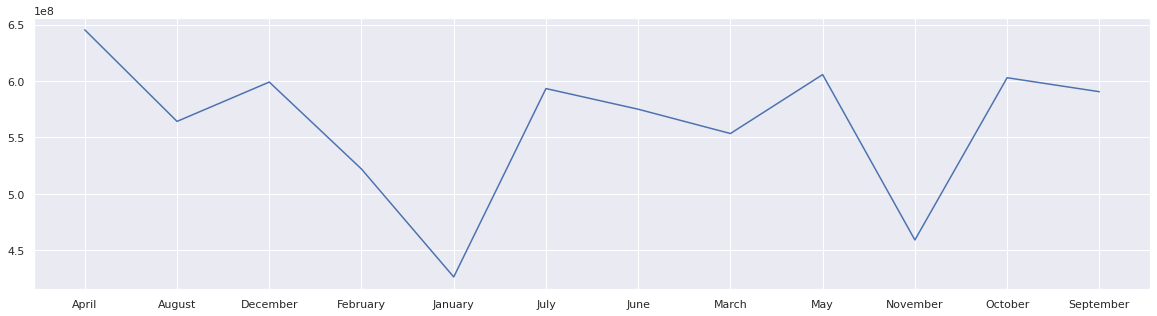

In [ ]:
df_average_sales_week = sales_feature.groupby(by=['month'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.month, df_average_sales_week.Weekly_Sales)
plt.show()

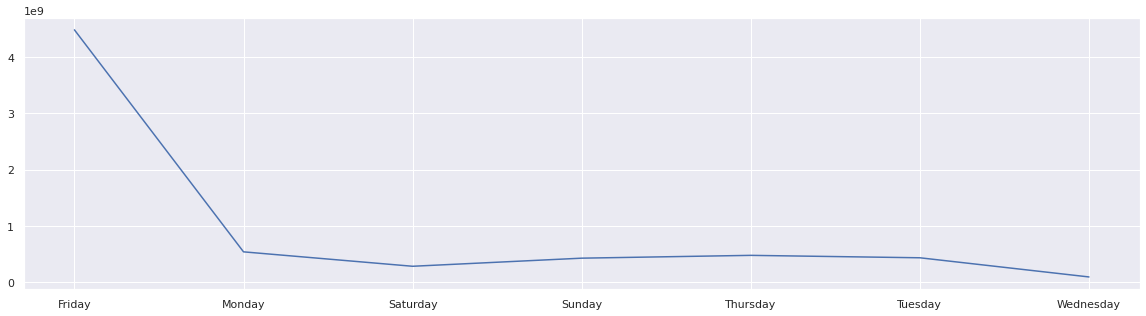

In [ ]:
df_average_sales_week = sales_feature.groupby(by=['weekday'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.weekday, df_average_sales_week.Weekly_Sales)
plt.show()

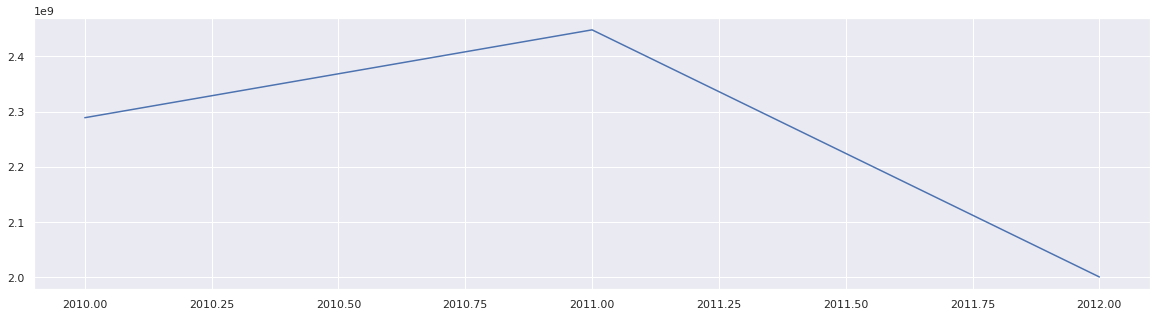

In [ ]:
df_average_sales_week = sales_feature.groupby(by=['year'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.year, df_average_sales_week.Weekly_Sales)
plt.show()

In [ ]:
sales_feature.head(-5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421560,45,98,2012-08-24,415.40,False,72.62,3.834,7936.20,58.38,22.00,...,191.344887,8.684,False,B,118221,2012,34,201234,Friday,August
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,...,191.461281,8.684,False,B,118221,2012,35,201235,Friday,August
421562,45,98,2012-07-09,352.44,True,75.70,3.911,11024.45,12.80,52.63,...,191.577676,8.684,True,B,118221,2012,28,201228,Monday,July
421563,45,98,2012-09-14,605.96,False,67.87,3.948,11407.95,NaN,4.30,...,191.699850,8.684,False,B,118221,2012,37,201237,Friday,September


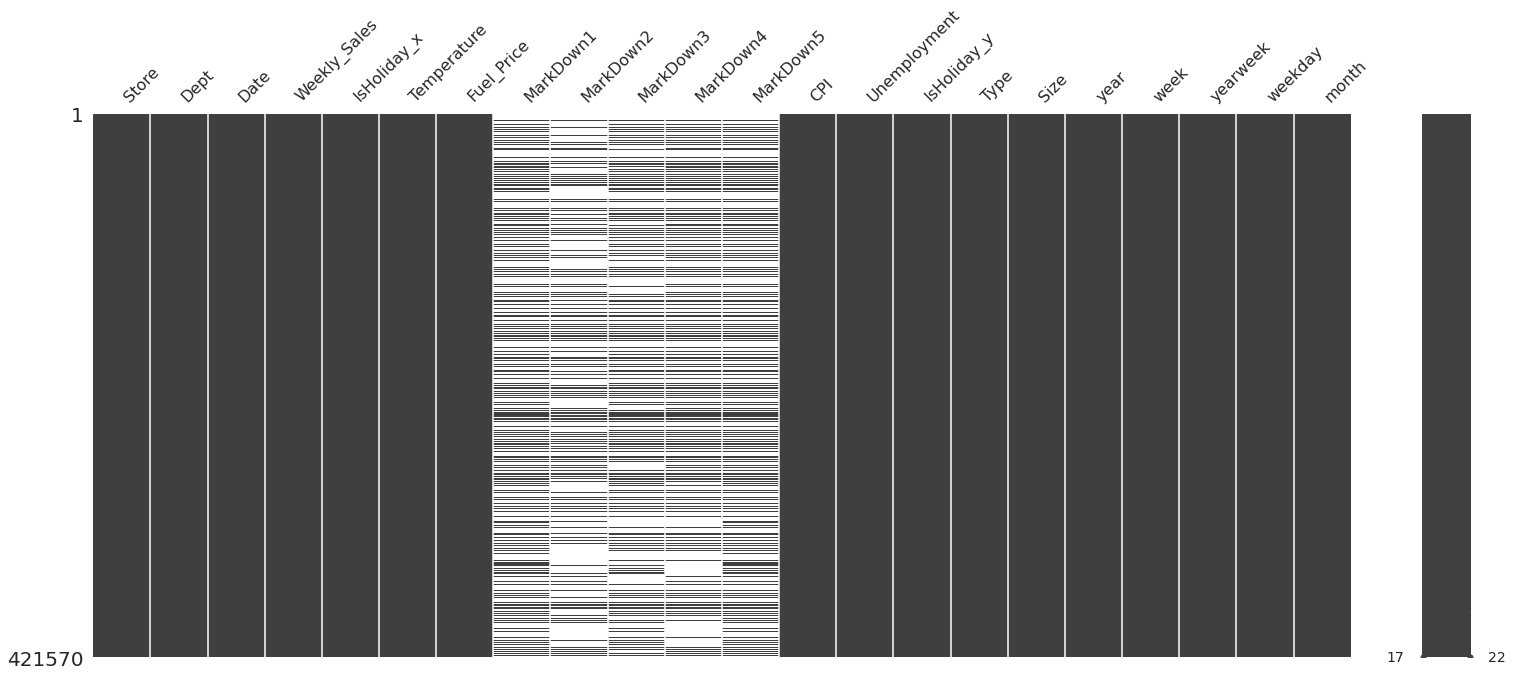

In [ ]:
msno.matrix(sales_feature)

In [ ]:
def find_missing_values(df, columns):
    missing_values = {}
    for column in columns:
        missing_values[column] = df[column].isna().sum()
    return missing_values
missing_values = find_missing_values(sales_feature, sales_feature.columns)
missing_values

{'Store': 0,
 'Dept': 0,
 'Date': 0,
 'Weekly_Sales': 0,
 'IsHoliday_x': 0,
 'Temperature': 0,
 'Fuel_Price': 0,
 'MarkDown1': 270889,
 'MarkDown2': 310322,
 'MarkDown3': 284479,
 'MarkDown4': 286603,
 'MarkDown5': 270138,
 'CPI': 0,
 'Unemployment': 0,
 'IsHoliday_y': 0,
 'Type': 0,
 'Size': 0,
 'year': 0,
 'week': 0,
 'yearweek': 0,
 'weekday': 0,
 'month': 0}

In [ ]:
# print(len(sales_feature['MarkDown1'].unique()))
print(sales_feature['MarkDown1'].mean())
print(sales_feature['MarkDown1'].mode())
print(sales_feature['MarkDown1'].median())


7246.420195910699
0      1.50
1    460.73
dtype: float64
5347.45


In [ ]:
print(sales_feature['MarkDown2'].mean())
print(sales_feature['MarkDown2'].mode())
print(sales_feature['MarkDown2'].median())

3334.628621098572
0    1.91
dtype: float64
192.0


In [ ]:
print(sales_feature['MarkDown3'].mean())
print(sales_feature['MarkDown3'].mode())
print(sales_feature['MarkDown3'].median())

1439.421384190147
0    3.0
dtype: float64
24.6


In [ ]:
print(sales_feature['MarkDown4'].mean())
print(sales_feature['MarkDown4'].mode())
print(sales_feature['MarkDown4'].median())

3383.1682560926743
0    9.0
dtype: float64
1481.31


In [ ]:
print(sales_feature['MarkDown5'].mean())
print(sales_feature['MarkDown5'].mode())
print(sales_feature['MarkDown5'].median())

4628.975079177479
0    2743.18
dtype: float64
3359.45


In [ ]:
sales_feature['MarkDown1'].fillna(sales_feature['MarkDown1'].median(), inplace=True)
sales_feature['MarkDown2'].fillna(sales_feature['MarkDown2'].median(), inplace=True)
sales_feature['MarkDown3'].fillna(sales_feature['MarkDown3'].median(), inplace=True)
sales_feature['MarkDown4'].fillna(sales_feature['MarkDown4'].median(), inplace=True)
sales_feature['MarkDown5'].fillna(sales_feature['MarkDown5'].median(), inplace=True)
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,5347.45,192.0,24.6,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,5347.45,192.0,24.6,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5347.45,192.0,24.6,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5347.45,192.0,24.6,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,5347.45,192.0,24.6,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May


In [ ]:
def find_missing_values(df, columns):
    missing_values = {}
    for column in columns:
        missing_values[column] = df[column].isna().sum()
    return missing_values
missing_values = find_missing_values(sales_feature, sales_feature.columns)
missing_values

{'Store': 0,
 'Dept': 0,
 'Date': 0,
 'Weekly_Sales': 0,
 'IsHoliday_x': 0,
 'Temperature': 0,
 'Fuel_Price': 0,
 'MarkDown1': 0,
 'MarkDown2': 0,
 'MarkDown3': 0,
 'MarkDown4': 0,
 'MarkDown5': 0,
 'CPI': 0,
 'Unemployment': 0,
 'IsHoliday_y': 0,
 'Type': 0,
 'Size': 0,
 'year': 0,
 'week': 0,
 'yearweek': 0,
 'weekday': 0,
 'month': 0}

In [ ]:
sales_feature['IsHoliday_x'] = sales_feature['IsHoliday_x'].replace('False', 1)
# sales_feature['IsHoliday_y'] = sales_feature['IsHoliday_y'].replace(['False'], '0')
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,5347.45,192.0,24.6,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,5347.45,192.0,24.6,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5347.45,192.0,24.6,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5347.45,192.0,24.6,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,5347.45,192.0,24.6,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May


In [ ]:
sales_feature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,IsHoliday_y,Type,Size,year,week,yearweek,weekday,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,5347.45,192.0,24.6,...,211.096358,8.106,False,A,151315,2010,17,201017,Sunday,May
1,1,1,2010-12-02,46039.49,True,38.51,2.548,5347.45,192.0,24.6,...,211.242170,8.106,True,A,151315,2010,48,201048,Thursday,December
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5347.45,192.0,24.6,...,211.289143,8.106,False,A,151315,2010,7,201007,Friday,February
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5347.45,192.0,24.6,...,211.319643,8.106,False,A,151315,2010,8,201008,Friday,February
4,1,1,2010-05-03,21827.90,False,46.50,2.625,5347.45,192.0,24.6,...,211.350143,8.106,False,A,151315,2010,18,201018,Monday,May


In [ ]:
sales_feature = sales_feature.drop(['Date', 'IsHoliday_y'], axis = 1) 
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week,yearweek,weekday,month
0,1,1,24924.50,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315,2010,17,201017,Sunday,May
1,1,1,46039.49,True,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315,2010,48,201048,Thursday,December
2,1,1,41595.55,False,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315,2010,7,201007,Friday,February
3,1,1,19403.54,False,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315,2010,8,201008,Friday,February
4,1,1,21827.90,False,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315,2010,18,201018,Monday,May


In [ ]:
sales_feature = sales_feature.drop(['yearweek', 'weekday','month','Fuel_Price'], axis = 1) 
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
0,1,1,24924.50,False,42.31,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315,2010,17
1,1,1,46039.49,True,38.51,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315,2010,48
2,1,1,41595.55,False,39.93,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315,2010,7
3,1,1,19403.54,False,46.63,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315,2010,8
4,1,1,21827.90,False,46.50,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315,2010,18


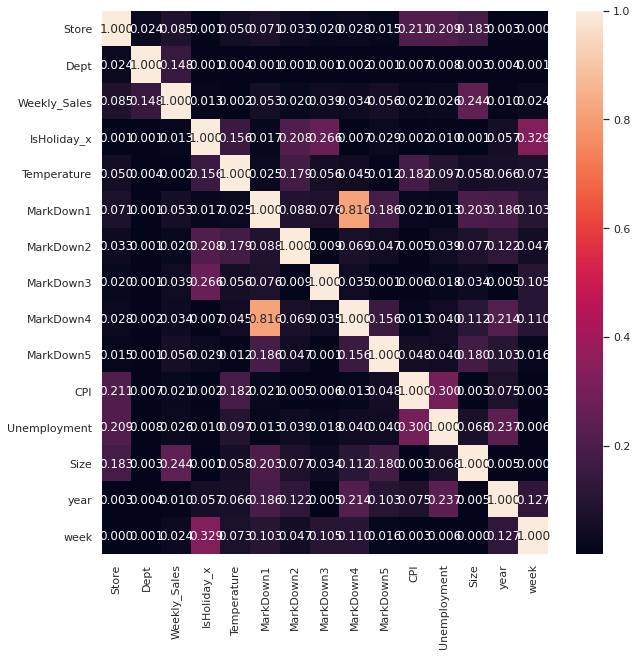

In [ ]:
corr = sales_feature.corr()
corr = abs(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
sales_feature = sales_feature.drop(['year'], axis = 1) 
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week
0,1,1,24924.50,False,42.31,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315,17
1,1,1,46039.49,True,38.51,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315,48
2,1,1,41595.55,False,39.93,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315,7
3,1,1,19403.54,False,46.63,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315,8
4,1,1,21827.90,False,46.50,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315,18


In [ ]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_data = stores_data.drop(['Size'], axis = 1) 
stores_data.head()

,Store,Type
0,1,A
1,2,A
2,3,B
3,4,A
4,5,B


In [ ]:
# # sales_feature = sales_data.merge(feature_data, left_on=('Store', 'Date'), 
# #                                  right_on=('Store', 'Date'), how='left')
# # # sales_feature.head()

# sales_feature = pd.merge(sales_feature, stores_data, how = 'left', on=['Store'])
# print(sales_feature.shape)
# sales_feature.head()



In [ ]:
sales_feature = pd.concat([sales_feature,pd.get_dummies(sales_feature['Type'], prefix='type')],axis=1)
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,type_A,type_B,type_C
0,1,1,24924.50,False,42.31,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315,17,1,0,0
1,1,1,46039.49,True,38.51,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315,48,1,0,0
2,1,1,41595.55,False,39.93,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315,7,1,0,0
3,1,1,19403.54,False,46.63,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315,8,1,0,0
4,1,1,21827.90,False,46.50,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315,18,1,0,0


In [ ]:
sales_feature = sales_feature.drop(['Type','type_C'], axis=1)
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,type_A,type_B
0,1,1,24924.50,False,42.31,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,17,1,0
1,1,1,46039.49,True,38.51,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,151315,48,1,0
2,1,1,41595.55,False,39.93,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,151315,7,1,0
3,1,1,19403.54,False,46.63,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,151315,8,1,0
4,1,1,21827.90,False,46.50,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,151315,18,1,0


In [ ]:
sales_feature['IsHoliday_x'] = pd.factorize(sales_feature.IsHoliday_x)[0]
sales_feature.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,type_A,type_B
0,1,1,24924.50,0,42.31,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,151315,17,1,0
1,1,1,46039.49,1,38.51,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,151315,48,1,0
2,1,1,41595.55,0,39.93,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,151315,7,1,0
3,1,1,19403.54,0,46.63,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,151315,8,1,0
4,1,1,21827.90,0,46.50,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,151315,18,1,0


In [ ]:
sales_feature.head(-5)

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,type_A,type_B
0,1,1,24924.50,0,42.31,5347.45,192.00,24.60,1481.31,3359.45,211.096358,8.106,151315,17,1,0
1,1,1,46039.49,1,38.51,5347.45,192.00,24.60,1481.31,3359.45,211.242170,8.106,151315,48,1,0
2,1,1,41595.55,0,39.93,5347.45,192.00,24.60,1481.31,3359.45,211.289143,8.106,151315,7,1,0
3,1,1,19403.54,0,46.63,5347.45,192.00,24.60,1481.31,3359.45,211.319643,8.106,151315,8,1,0
4,1,1,21827.90,0,46.50,5347.45,192.00,24.60,1481.31,3359.45,211.350143,8.106,151315,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421560,45,98,415.40,0,72.62,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,118221,34,0,1
421561,45,98,346.04,0,75.09,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,118221,35,0,1
421562,45,98,352.44,1,75.70,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,118221,28,0,1
421563,45,98,605.96,0,67.87,11407.95,192.00,4.30,3421.72,5268.92,191.699850,8.684,118221,37,0,1


In [ ]:
X = sales_feature.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
Y = sales_feature.iloc[:, 2].values

In [ ]:
X

array([[ 1.,  1.,  0., ..., 17.,  1.,  0.],
       [ 1.,  1.,  1., ..., 48.,  1.,  0.],
       [ 1.,  1.,  0., ...,  7.,  1.,  0.],
       ...,
       [45., 98.,  0., ..., 50.,  0.,  1.],
       [45., 98.,  0., ..., 42.,  0.,  1.],
       [45., 98.,  0., ..., 43.,  0.,  1.]])

In [ ]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,0.0,42.31,5347.45,192.00,24.60,1481.31,3359.45,211.096358,8.106,151315.0,17.0,1.0,0.0
1,1.0,1.0,1.0,38.51,5347.45,192.00,24.60,1481.31,3359.45,211.242170,8.106,151315.0,48.0,1.0,0.0
2,1.0,1.0,0.0,39.93,5347.45,192.00,24.60,1481.31,3359.45,211.289143,8.106,151315.0,7.0,1.0,0.0
3,1.0,1.0,0.0,46.63,5347.45,192.00,24.60,1481.31,3359.45,211.319643,8.106,151315.0,8.0,1.0,0.0
4,1.0,1.0,0.0,46.50,5347.45,192.00,24.60,1481.31,3359.45,211.350143,8.106,151315.0,18.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45.0,98.0,0.0,64.88,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221.0,39.0,0.0,1.0
421566,45.0,98.0,0.0,64.89,5046.74,192.00,18.82,2253.43,2340.01,192.170412,8.667,118221.0,19.0,0.0,1.0
421567,45.0,98.0,0.0,54.47,1956.28,192.00,7.89,599.32,3990.54,192.327265,8.667,118221.0,50.0,0.0,1.0
421568,45.0,98.0,0.0,56.47,2004.02,192.00,3.18,437.73,1537.49,192.330854,8.667,118221.0,42.0,0.0,1.0


In [ ]:
df = pd.DataFrame(Y)
df

,0
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90
...,...
421565,508.37
421566,628.10
421567,1061.02
421568,760.01


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [ ]:
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,12.0,94.0,0.0,76.03,10073.64,192.0,76.29,1671.53,3721.62,131.136000,11.627,112238.0,14.0,0.0,1.0
1,26.0,59.0,0.0,59.42,5347.45,192.0,24.60,1481.31,3359.45,136.419500,7.767,152513.0,39.0,1.0,0.0
2,24.0,32.0,0.0,58.70,6503.15,-192.0,97.28,1798.06,1286.62,138.088267,8.983,203819.0,45.0,1.0,0.0
3,20.0,50.0,0.0,24.27,5347.45,192.0,24.60,1481.31,3359.45,204.687738,7.484,203742.0,41.0,1.0,0.0
4,18.0,51.0,1.0,26.10,5347.45,192.0,24.60,1481.31,3359.45,132.815032,9.331,120653.0,52.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358329,38.0,87.0,0.0,82.97,192.78,192.0,24.60,1.50,2251.80,131.010333,10.926,39690.0,38.0,0.0,0.0
358330,38.0,59.0,0.0,53.77,5347.45,192.0,24.60,1481.31,3359.45,126.578286,13.975,39690.0,18.0,0.0,0.0
358331,16.0,32.0,0.0,28.60,5347.45,192.0,24.60,1481.31,3359.45,191.573192,6.614,57197.0,3.0,0.0,1.0
358332,13.0,3.0,0.0,42.49,5347.45,192.0,24.60,1481.31,3359.45,128.719935,7.193,219622.0,1.0,1.0,0.0


In [ ]:
df = pd.DataFrame(Y_train)
df

,0
0,39.36
1,95.43
2,8706.57
3,2971.08
4,5.36
...,...
358329,784.50
358330,76.02
358331,5259.85
358332,16648.02


In [ ]:
df = pd.DataFrame(X_test)
df = df.rename(columns={0: 'Store', 1: 'Dept',2: 'Holiday',12: 'Week'})
df.head()

,Store,Dept,Holiday,3,4,5,6,7,8,9,10,11,Week,13,14
0,24.0,55.0,0.0,55.75,5347.45,192.0,24.6,1481.31,3359.45,134.514367,8.212,203819.0,22.0,1.0,0.0
1,10.0,11.0,0.0,68.76,5347.45,192.0,24.6,1481.31,3359.45,126.436419,9.003,126512.0,43.0,0.0,1.0
2,39.0,59.0,0.0,83.24,5347.45,192.0,24.6,1481.31,3359.45,210.097523,8.464,184109.0,25.0,1.0,0.0
3,19.0,60.0,0.0,61.32,5347.45,192.0,24.6,1481.31,3359.45,136.367000,7.806,203819.0,38.0,1.0,0.0
4,3.0,45.0,0.0,47.07,5347.45,192.0,24.6,1481.31,3359.45,214.619887,7.368,37392.0,7.0,0.0,1.0


In [ ]:
testing = df[['Store','Dept','Holiday','Week']]
testing.head()

,Store,Dept,Holiday,Week
0,24.0,55.0,0.0,22.0
1,10.0,11.0,0.0,43.0
2,39.0,59.0,0.0,25.0
3,19.0,60.0,0.0,38.0
4,3.0,45.0,0.0,7.0


In [ ]:
df = pd.DataFrame(Y_test)
df

,0
0,9526.04
1,26393.68
2,736.16
3,422.40
4,4.00
...,...
63231,37.67
63232,6861.34
63233,15.42
63234,7647.13


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:, [0,1,3,4,5,6,7,8,9,10,11]] = sc_X.fit_transform(X_train[:, [0,1,3,4,5,6,7,8,9,10,11]])
X_test[:, [0,1,3,4,5,6,7,8,9,10,11]] = sc_X.transform(X_test[:, [0,1,3,4,5,6,7,8,9,10,11]])


In [ ]:
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.798283,1.630929,0.0,0.863565,0.806894,-0.164080,-0.074533,-0.113972,-0.026880,-1.024159,1.965325,-0.401586,14.0,0.0,1.0
1,0.297166,0.483177,0.0,-0.037275,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-0.889244,-0.105476,0.259122,39.0,1.0,0.0
2,0.140673,-0.402233,0.0,-0.076324,0.095281,-0.240311,-0.070760,-0.079230,-0.692548,-0.846632,0.546880,1.100793,45.0,1.0,0.0
3,-0.172312,0.188040,0.0,-1.943627,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,0.853997,-0.257299,1.099529,41.0,1.0,0.0
4,-0.328805,0.220833,1.0,-1.844377,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-0.981285,0.733574,-0.263539,52.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358329,1.236122,1.401379,0.0,1.239954,-1.162402,-0.164080,-0.083825,-0.572514,-0.428692,-1.027368,1.589255,-1.591730,38.0,0.0,0.0
358330,1.236122,0.483177,0.0,-0.343701,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-1.140541,3.224973,-1.591730,18.0,0.0,0.0
358331,-0.485298,-0.402233,0.0,-1.708790,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,0.519115,-0.724034,-1.304529,3.0,0.0,1.0
358332,-0.720037,-1.353228,0.0,-0.955469,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-1.085854,-0.413414,1.360039,1.0,1.0,0.0


In [ ]:
df = pd.DataFrame(X_test)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.140673,0.352005,0.0,-0.236316,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-0.937892,0.133256,1.100793,22.0,1.0,0.0
1,-0.954776,-1.090884,0.0,0.469278,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-1.144164,0.557609,-0.167422,43.0,0.0,1.0
2,1.314369,0.483177,0.0,1.254598,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,0.992137,0.268448,0.777452,25.0,1.0,0.0
3,-0.250559,0.515969,0.0,0.065771,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-0.890585,-0.084554,1.100793,38.0,1.0,0.0
4,-1.502500,0.024075,0.0,-0.707074,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,1.107616,-0.319531,-1.629428,7.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63231,0.844891,-0.074303,0.0,1.407540,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-1.151833,1.011469,-1.591730,14.0,1.0,0.0
63232,-0.563544,-1.353228,0.0,0.050586,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-0.990970,0.118771,-0.212946,44.0,0.0,1.0
63233,1.627354,0.384798,0.0,0.491514,-1.196104,-0.200758,-0.087168,-0.166201,-0.821463,1.110722,0.469627,-1.569222,43.0,0.0,0.0
63234,-0.407051,-1.058091,0.0,-0.691888,-0.135055,-0.164080,-0.083825,-0.166201,-0.125888,-1.146966,-0.578649,-0.714100,41.0,0.0,1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regressor, X_train, Y_train, cv=10)
accuracy.mean()

0.959904842692136

In [ ]:
Y_pred = regressor.predict(X_test)


In [ ]:
Y_pred

array([11527.614, 27545.933,   495.442, ...,   235.761,  8078.549,
          34.543])

In [ ]:
df = pd.DataFrame(Y_pred)
pred = df.rename(columns={0: 'pred'})
pred

,pred
0,11527.614
1,27545.933
2,495.442
3,455.415
4,15.477
...,...
63231,33.038
63232,7428.251
63233,235.761
63234,8078.549


In [ ]:
df = pd.DataFrame(Y_test)
given = df.rename(columns={0: 'given'})
given

,given
0,9526.04
1,26393.68
2,736.16
3,422.40
4,4.00
...,...
63231,37.67
63232,6861.34
63233,15.42
63234,7647.13


In [ ]:
from sklearn.metrics import r2_score 
r2_score(Y_test,Y_pred)

0.9615713545253634

In [ ]:
output = pd.DataFrame({'Store': testing.Store,'Dept': testing.Dept,'Holiday': testing.Holiday,'Week': testing.Week,'Weekly_sales_predicted': pred.pred,'Weekly_sales_given': given.given})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
p = pd.read_csv("my_submission.csv")
p.head()

,Store,Dept,Holiday,Week,Weekly_sales_predicted,Weekly_sales_given
0,24.0,55.0,0.0,22.0,11527.614,9526.04
1,10.0,11.0,0.0,43.0,27545.933,26393.68
2,39.0,59.0,0.0,25.0,495.442,736.16
3,19.0,60.0,0.0,38.0,455.415,422.40
4,3.0,45.0,0.0,7.0,15.477,4.00
